# Classification using Logisitic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from acquire import get_titanic_data
from prepare import prep_titanic    

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from model_evaluation_functions import *


import warnings
warnings.filterwarnings("ignore")

In [2]:
df_titanic = prep_titanic()

In [3]:
df_titanic.head()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone,Queenstown,Southampton,Second,Third,male
0,0,0,3,22.0,1,0,7.2500,0,0,1,0,1,1
1,1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,2,1,3,26.0,0,0,7.9250,1,0,1,0,1,0
3,3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0
4,4,0,3,35.0,0,0,8.0500,1,0,1,0,1,1


In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   age           714 non-null    float64
 4   sibsp         891 non-null    int64  
 5   parch         891 non-null    int64  
 6   fare          891 non-null    float64
 7   alone         891 non-null    int64  
 8   Queenstown    891 non-null    uint8  
 9   Southampton   891 non-null    uint8  
 10  Second        891 non-null    uint8  
 11  Third         891 non-null    uint8  
 12  male          891 non-null    uint8  
dtypes: float64(2), int64(6), uint8(5)
memory usage: 60.2 KB


In [5]:
df_titanic.select_dtypes(exclude='O')

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone,Queenstown,Southampton,Second,Third,male
0,0,0,3,22.0,1,0,7.2500,0,0,1,0,1,1
1,1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,2,1,3,26.0,0,0,7.9250,1,0,1,0,1,0
3,3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0
4,4,0,3,35.0,0,0,8.0500,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,27.0,0,0,13.0000,1,0,1,1,0,1
887,887,1,1,19.0,0,0,30.0000,1,0,1,0,0,0
888,888,0,3,NaN,1,2,23.4500,0,0,1,0,1,0
889,889,1,1,26.0,0,0,30.0000,1,0,0,0,0,1


In [6]:
df_titanic.dropna(how='any',
                  subset=['age'],
                  inplace=True)

# Test Models
## _Model 1_

In [7]:
# X = df_titanic.loc[:, 'fare':'class_Third']
X = df_titanic[['pclass','age','fare','sibsp','parch']]
y = df_titanic['survived']

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X,
                                                                      y,
                                                                      test_size=.2,
                                                                      random_state=123
                                                                      )

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate,
                                                            y_train_validate,
                                                            test_size=.3,
                                                            random_state=123
                                                            )


print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (399, 5) , validate:  (172, 5) , test:  (143, 5)
train:  (399,) , validate:  (172,) , test:  (143,)


In [8]:
logit_test_model_1 = LogisticRegression(C=1,
                                   class_weight={0:1, 1:99},
                                   random_state=123,
                                   intercept_scaling=1,
                                   solver='lbfgs'
                                   )

In [9]:
logit_test_model_1.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 99}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
print('Coefficient: \n', logit_test_model_1.coef_)
print('Intercept: \n', logit_test_model_1.intercept_)

Coefficient: 
 [[-1.16035326 -0.03110108  0.00399115 -0.45129797  0.52083144]]
Intercept: 
 [7.65390045]


In [11]:
y_pred = logit_test_model_1.predict(X_train)
y_pred_proba = logit_test_model_1.predict_proba(X_train)
print(y_pred)
print(y_pred_proba)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[5.38032613e-03 9.94619674e-01]
 [9.95313098e-03 9.90046869e-01]
 [1.98570853e-03 9.98014291e-01]
 [1.01714994e-02 9.89828501e-01]
 [3.88457002e-02 9.61154300e-01]
 [2.78936731e-02 9.721063

In [12]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit_test_model_1.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.43


In [13]:
print(confusion_matrix(y_train, y_pred))

[[  0 228]
 [  0 171]]


In [14]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       228
           1       0.43      1.00      0.60       171

    accuracy                           0.43       399
   macro avg       0.21      0.50      0.30       399
weighted avg       0.18      0.43      0.26       399



## _Model 2_

In [15]:
logit_test_model_2 = LogisticRegression(C=.1,
class_weight={0:1, 1:99},
random_state=123,
intercept_scaling=1,
solver='lbfgs')

In [16]:
logit_test_model_2.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight={0: 1, 1: 99}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
print('Coefficient: \n', logit_test_model_2.coef_)
print('Intercept: \n', logit_test_model_2.intercept_)

Coefficient: 
 [[-1.00329345 -0.02877517  0.00604013 -0.40518742  0.44919365]]
Intercept: 
 [7.14670159]


In [18]:
y_pred2 = logit_test_model_2.predict(X_train)
y_pred_proba2 = logit_test_model_2.predict_proba(X_train)

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit_test_model_2.score(X_train, y_train)))

print(confusion_matrix(y_train, y_pred2))

print(classification_report(y_train, y_pred2))

Accuracy of Logistic Regression classifier on training set: 0.43
[[  0 228]
 [  0 171]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       228
           1       0.43      1.00      0.60       171

    accuracy                           0.43       399
   macro avg       0.21      0.50      0.30       399
weighted avg       0.18      0.43      0.26       399



# Logistic Regression Exercises

## 1.
Start by defining your baseline model. 

## 2.
Create another model that includes `age` in addition to `fare` and `pclass`. Does this model perform better than your previous one?
### Model 1

In [19]:
X = df_titanic[['pclass', 'age', 'fare']]
y = df_titanic['survived']

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X,
                                                                      y,
                                                                      test_size=.2,
                                                                      random_state=123
                                                                      )

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate,
                                                            y_train_validate,
                                                            test_size=.3,
                                                            random_state=123
                                                            )


print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (399, 3) , validate:  (172, 3) , test:  (143, 3)
train:  (399,) , validate:  (172,) , test:  (143,)


In [20]:
logit = LogisticRegression(random_state=123, solver='lbfgs')

In [21]:
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

print(confusion_matrix(y_train, y_pred))

print(classification_report(y_train, y_pred))

Coefficient: 
 [[-1.00444388 -0.02941366  0.00518596]]
Intercept: 
 [2.60928736]
Accuracy of Logistic Regression classifier on training set: 0.70
[[191  37]
 [ 81  90]]
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       228
           1       0.71      0.53      0.60       171

    accuracy                           0.70       399
   macro avg       0.71      0.68      0.68       399
weighted avg       0.70      0.70      0.70       399



## 3.
Include `sex` in your model as well.
> Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

### Model 2

In [23]:
X = df_titanic[['pclass', 'age', 'fare', 'male']]
y = df_titanic['survived']

X_train_validate2, X_test2, y_train_validate2, y_test2 = train_test_split(X,
                                                                      y,
                                                                      test_size=.2,
                                                                      random_state=123
                                                                      )

X_train2, X_validate2, y_train2, y_validate2 = train_test_split(X_train_validate,
                                                            y_train_validate,
                                                            test_size=.3,
                                                            random_state=123
                                                            )


print("train: ", X_train2.shape, ", validate: ", X_validate2.shape, ", test: ", X_test2.shape)
print("train: ", y_train2.shape, ", validate: ", y_validate2.shape, ", test: ", y_test2.shape)

train:  (399, 3) , validate:  (172, 3) , test:  (143, 4)
train:  (399,) , validate:  (172,) , test:  (143,)


In [24]:
logit_2 = LogisticRegression(random_state=123, intercept_scaling=1, solver='lbfgs')

In [25]:
logit_2.fit(X_train2, y_train2)

print('Coefficient: \n', logit_2.coef_)
print('Intercept: \n', logit_2.intercept_)

y_pred2 = logit_2.predict(X_train2)
y_pred_proba2 = logit_2.predict_proba(X_train2)

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit_2.score(X_train2, y_train2)))

print(confusion_matrix(y_train2, y_pred2))

print(classification_report(y_train2, y_pred2))

Coefficient: 
 [[-1.00444388 -0.02941366  0.00518596]]
Intercept: 
 [2.60928736]
Accuracy of Logistic Regression classifier on training set: 0.70
[[191  37]
 [ 81  90]]
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       228
           1       0.71      0.53      0.60       171

    accuracy                           0.70       399
   macro avg       0.71      0.68      0.68       399
weighted avg       0.70      0.70      0.70       399



## 4.
Try out other combinations of features and models.

### Model 3

In [26]:
X = df_titanic[['pclass', 'age', 'fare', 'male', 'Queenstown', 'Southampton']]
y = df_titanic['survived']

X_train_validate3, X_test3, y_train_validate3, y_test3 = train_test_split(X,
                                                                          y,
                                                                          test_size=.2,
                                                                          random_state=123
                                                                          )

X_train3, X_validate3, y_train3, y_validate3 = train_test_split(X_train_validate3,
                                                            y_train_validate3,
                                                            test_size=.3,
                                                            random_state=123
                                                            )


print("train: ", X_train3.shape, ", validate: ", X_validate3.shape, ", test: ", X_test3.shape)
print("train: ", y_train3.shape, ", validate: ", y_validate3.shape, ", test: ", y_test3.shape)

train:  (399, 6) , validate:  (172, 6) , test:  (143, 6)
train:  (399,) , validate:  (172,) , test:  (143,)


In [27]:
logit_3 = LogisticRegression(random_state=123, solver='lbfgs')

In [28]:
logit_3.fit(X_train3, y_train3)

print('Coefficient: \n', logit_3.coef_)
print('Intercept: \n', logit_3.intercept_)

y_pred3 = logit_3.predict(X_train3)
y_pred_proba3 = logit_3.predict_proba(X_train3)

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit_3.score(X_train3, y_train3)))

print(confusion_matrix(y_train3, y_pred3))

print(classification_report(y_train3, y_pred3))

Coefficient: 
 [[-1.05899184e+00 -2.77741850e-02  2.50423675e-03 -2.53771314e+00
  -9.11492204e-01 -4.04828933e-01]]
Intercept: 
 [4.71610197]
Accuracy of Logistic Regression classifier on training set: 0.81
[[196  32]
 [ 44 127]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       228
           1       0.80      0.74      0.77       171

    accuracy                           0.81       399
   macro avg       0.81      0.80      0.80       399
weighted avg       0.81      0.81      0.81       399



### Model 4

In [29]:
X = df_titanic[['fare', 'male']]
y = df_titanic['survived']

X_train_validate4, X_test4, y_train_validate4, y_test4 = train_test_split(X,
                                                                      y,
                                                                      test_size=.2,
                                                                      random_state=123
                                                                      )

X_train4, X_validate4, y_train4, y_validate4 = train_test_split(X_train_validate4,
                                                            y_train_validate4,
                                                            test_size=.3,
                                                            random_state=123
                                                            )


print("train: ", X_train4.shape, ", validate: ", X_validate4.shape, ", test: ", X_test4.shape)
print("train: ", y_train4.shape, ", validate: ", y_validate4.shape, ", test: ", y_test4.shape)

train:  (399, 2) , validate:  (172, 2) , test:  (143, 2)
train:  (399,) , validate:  (172,) , test:  (143,)


In [30]:
logit_4 = LogisticRegression(random_state=123, solver='lbfgs')

In [31]:
logit_4.fit(X_train4, y_train4)

print('Coefficient: \n', logit_4.coef_)
print('Intercept: \n', logit_4.intercept_)

y_pred4 = logit_4.predict(X_train4)
y_pred_proba4 = logit_4.predict_proba(X_train4)

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit_4.score(X_train4, y_train4)))

print(confusion_matrix(y_train4, y_pred4))

print(classification_report(y_train4, y_pred4))

Coefficient: 
 [[ 0.01527599 -2.44659372]]
Intercept: 
 [0.74930988]
Accuracy of Logistic Regression classifier on training set: 0.79
[[196  32]
 [ 51 120]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       228
           1       0.79      0.70      0.74       171

    accuracy                           0.79       399
   macro avg       0.79      0.78      0.78       399
weighted avg       0.79      0.79      0.79       399



## 5.
Use the best 3 models to predict and evaluate on the validate sample.

In [32]:
print("Accuracy Scores")
print('-' * 15)
print(f"Model 2: {logit_2.score(X_train2, y_train2):.2%}")
print(f"Model 3: {logit_3.score(X_train3, y_train3):.2%}")
print(f"Model 4: {logit_4.score(X_train4, y_train4):.2%}")

Accuracy Scores
---------------
Model 2: 70.43%
Model 3: 80.95%
Model 4: 79.20%


In [33]:
y_pred2 = logit_2.predict(X_validate2)
y_pred3 = logit_3.predict(X_validate3)
y_pred4 = logit_4.predict(X_validate4)

print("Model 2: solver = lbfgs, c = 1")

print('Accuracy: {:.3f}'.format(logit_2.score(X_validate2, y_validate2)))

print(confusion_matrix(y_validate2, y_pred2))

print(classification_report(y_validate2, y_pred2))

print("Model 3: solver = lbfgs, c = 1")

print('Accuracy: {:.3f}'.format(logit_3.score(X_validate3, y_validate3)))

print(confusion_matrix(y_validate3, y_pred3))

print(classification_report(y_validate3, y_pred3))

print("Model 4: solver = lbfgs, c = 1")

print('Accuracy: {:.3f}'.format(logit_4.score(X_validate4, y_validate4)))

print(confusion_matrix(y_validate4, y_pred4))

print(classification_report(y_validate4, y_pred4))


Model 2: solver = lbfgs, c = 1
Accuracy: 0.727
[[88 21]
 [26 37]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       109
           1       0.64      0.59      0.61        63

    accuracy                           0.73       172
   macro avg       0.70      0.70      0.70       172
weighted avg       0.72      0.73      0.72       172

Model 3: solver = lbfgs, c = 1
Accuracy: 0.779
[[85 24]
 [14 49]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       109
           1       0.67      0.78      0.72        63

    accuracy                           0.78       172
   macro avg       0.76      0.78      0.77       172
weighted avg       0.79      0.78      0.78       172

Model 4: solver = lbfgs, c = 1
Accuracy: 0.779
[[89 20]
 [18 45]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       109
           1       0.69      0.71      

##  6.
Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train? 

In [34]:
y_pred3 = logit_3.predict(X_test3)

print("Model 4: solver = lbfgs, c = 1")

print('Accuracy: {:.3f}'.format(logit_3.score(X_test3, y_test3)))

print(confusion_matrix(y_test3, y_pred3))

print(classification_report(y_test3, y_pred3))

Model 4: solver = lbfgs, c = 1
Accuracy: 0.755
[[68 19]
 [16 40]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.80        87
           1       0.68      0.71      0.70        56

    accuracy                           0.76       143
   macro avg       0.74      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143



# Decision Tree Classification - Examples

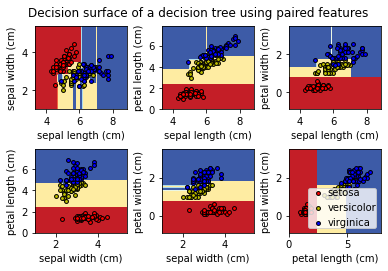

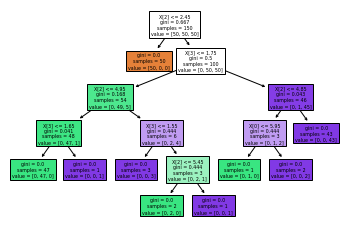

In [160]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

# Decision Tree Exercises

In [115]:
X = df_titanic.drop(columns='survived')
y = df_titanic[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X,
                                                                      y,
                                                                      test_size=.2,
                                                                      random_state=123
                                                                      )

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate,
                                                            y_train_validate,
                                                            test_size=.3,
                                                            random_state=123
                                                            )


print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (399, 12) , validate:  (172, 12) , test:  (143, 12)
train:  (399, 1) , validate:  (172, 1) , test:  (143, 1)


## 1.
Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [116]:
tree_clf = DecisionTreeClassifier()

In [117]:
tree_clf = tree_clf.fit(X_train, y_train)
y_prediction_train = tree_clf.predict(X_train)

## 2.
Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [118]:
# dt is abbreviated for Decision Tree
# m1 is abbreviated for Model 1
dt_m1_accuracy = tree_clf.score(X_train, y_train)

print(f"Model 1 Accuracy Score {dt_m1_accuracy:.2%}")

Model 1 Accuracy Score 100.00%


In [119]:
# cm is abbreviated for confusion matrix
cm_ml_1 = pd.DataFrame(confusion_matrix(y_train, y_prediction_train))
cm_ml_1

,0,1
0,228,0
1,0,171


In [120]:
print('Model 1' + classification_report(y_train, y_prediction_train))

Model 1              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       1.00      1.00      1.00       171

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399



## 3.
Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [131]:
evaluation_metrics(cm_ml_1, model_number=1)

,Model 1 Evaluation
Accuracy,100.0
True Positive Rate,100.0
False Positive Rate,0.0
True Negative Rate,100.0
False Negative Rate,0.0
Precision,100.0
Recall,100.0
F1 Score,100.0


In [122]:
support = pd.DataFrame(report.iloc[3,:2]).T

In [123]:
support

,0,1
support,228.0,171.0


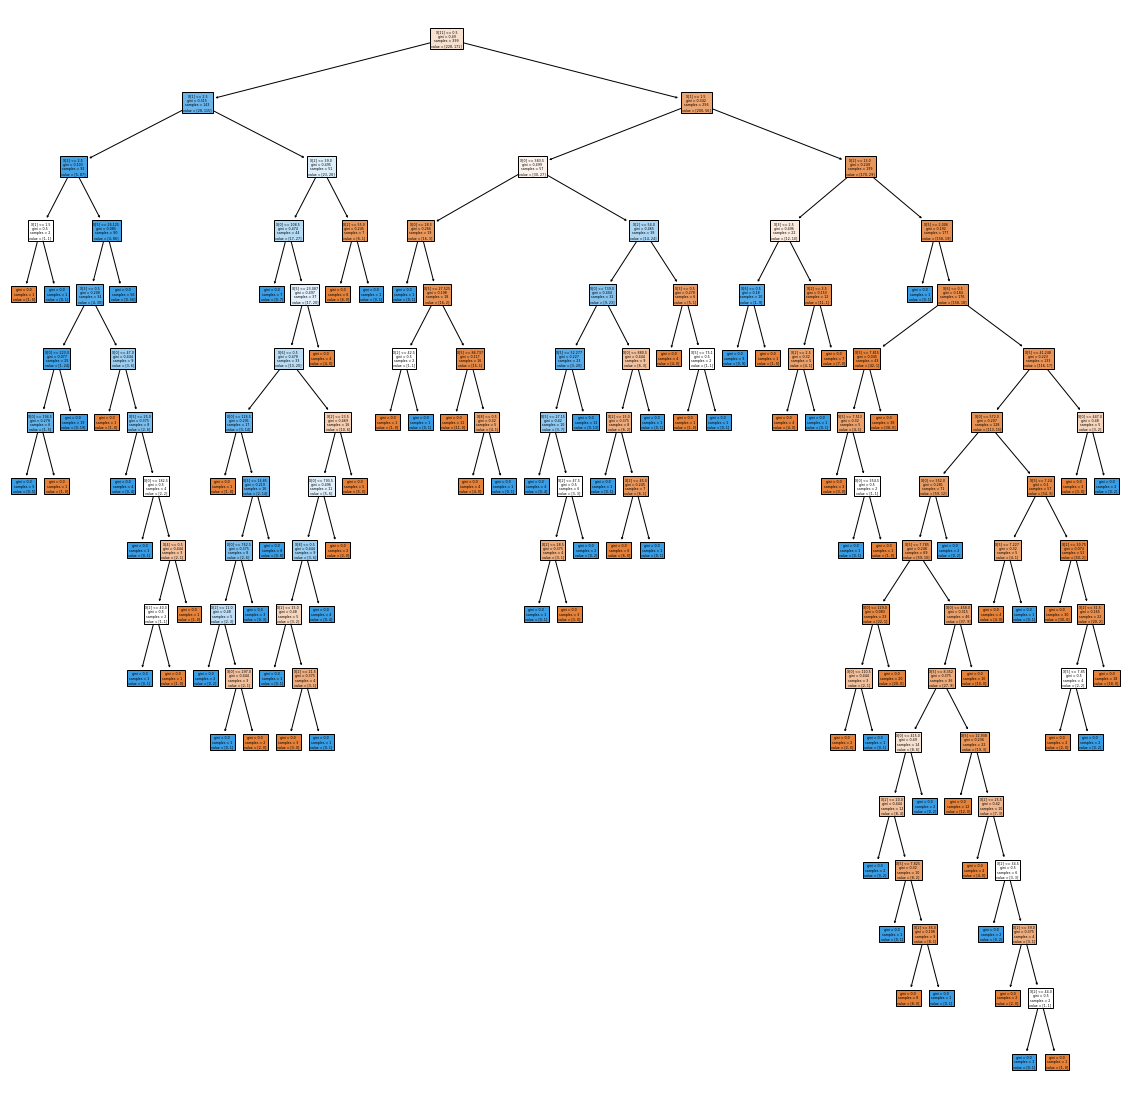

In [161]:
plt.figure(figsize=(20,20))
tree.plot_tree(tree_clf, filled=True);

## 4.
Run through steps 2-4 using a different max_depth value.

In [124]:
# DecisionTreeClassifier?

In [151]:
clf_2 = DecisionTreeClassifier(max_depth=3)

clf_2 = clf_2.fit(X_train, y_train)
y_2_prediction_train = clf_2.predict(X_train)

In [152]:
# dt is abbreviated for Decision Tree
# m1 is abbreviated for Model 1
dt_m2_accuracy = clf_2.score(X_train, y_train)

print(f"Model 2 Accuracy Score {dt_m2_accuracy:.2%}")

Model 2 Accuracy Score 82.71%


In [153]:
# cm is abbreviated for confusion matrix
cm_ml_2 = pd.DataFrame(confusion_matrix(y_train, y_2_prediction_train))
cm_ml_2

,0,1
0,193,35
1,34,137


In [154]:
print('Model 2' + classification_report(y_train, y_2_prediction_train))

Model 2              precision    recall  f1-score   support

           0       0.85      0.85      0.85       228
           1       0.80      0.80      0.80       171

    accuracy                           0.83       399
   macro avg       0.82      0.82      0.82       399
weighted avg       0.83      0.83      0.83       399



In [155]:
evaluation_metrics(cm_ml_2, model_number=2)

,Model 2 Evaluation
Accuracy,83.0
True Positive Rate,85.0
False Positive Rate,20.0
True Negative Rate,80.0
False Negative Rate,15.0
Precision,85.0
Recall,85.0
F1 Score,85.0


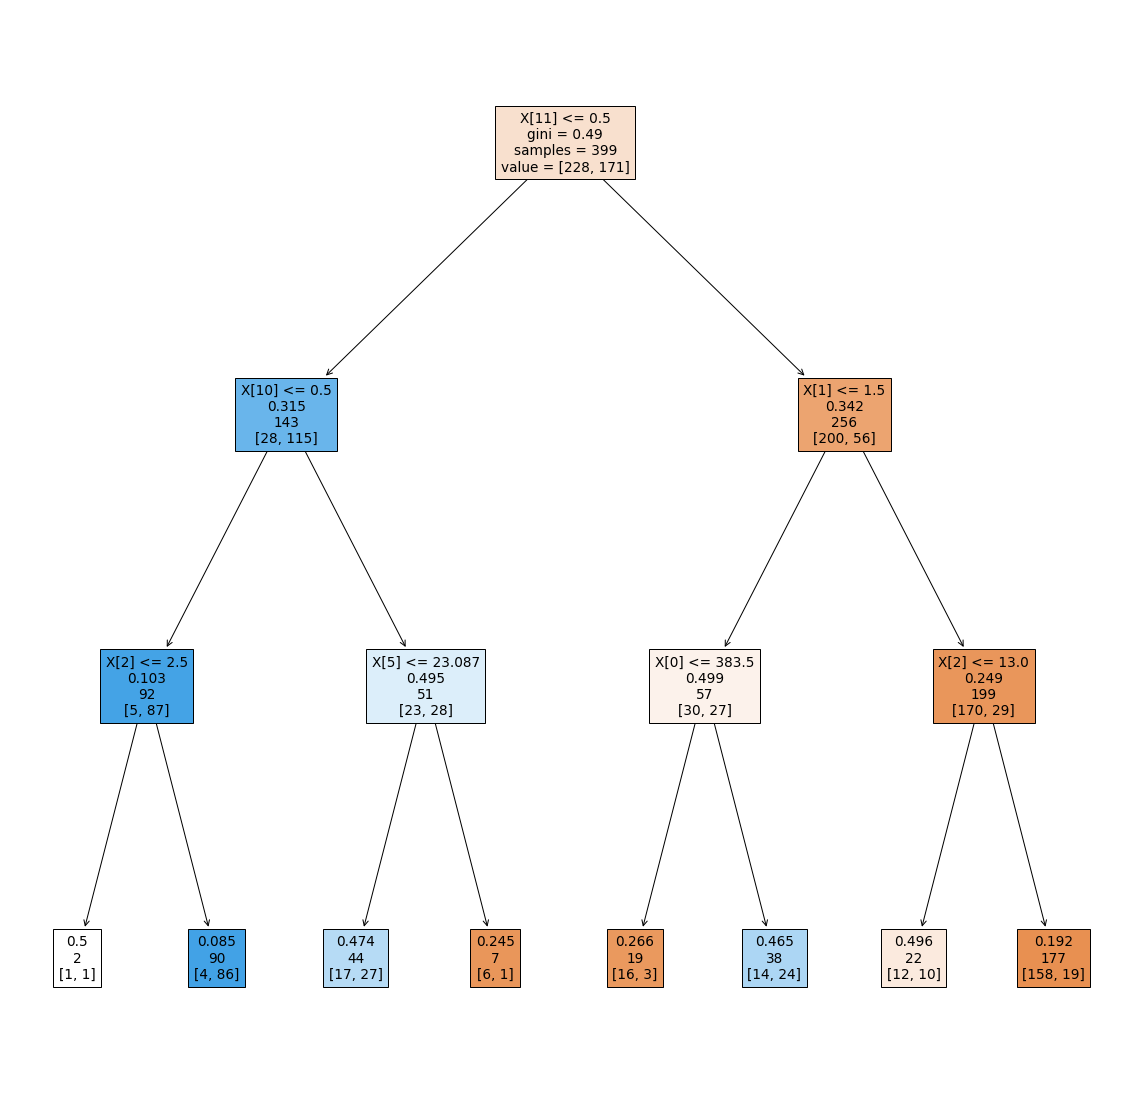

In [162]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf_2, filled=True, label='root');

## 5.
Which performs better on your in-sample data?